Import all the necessary Python packages and the stellar sample.

In [189]:
import ExoMultSimple as ExoMult
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, unique
from astropy.stats import mad_std

stellar=pd.read_csv("stellar_samples.csv",sep=",", engine='python', header=0)
laMOST= Table.read('table-03.fits', format='fits')


LAMOST=laMOST["EPIC_1","[Fe/H]","[Fe/H]_err","logg","logg_err", "Teff","Teff_err"]
LAMOST["EPIC"]=LAMOST["EPIC_1"]
LAMOST=LAMOST.to_pandas()
stellar=pd.merge(stellar,LAMOST[["EPIC", '[Fe/H]', '[Fe/H]_err',"logg","logg_err", "Teff", "Teff_err"]], on="EPIC", how="left")
# stellar["FeH"]=np.where(np.isfinite(stellar["[Fe/H]"]),stellar["[Fe/H]"],stellar.FeH)
stellar["U_FeH"]=np.where(np.isfinite(stellar["[Fe/H]_err"]),stellar["[Fe/H]_err"],stellar.U_FeH)



stellar["logg"]=np.where(np.isfinite(stellar["logg_y"]),stellar["logg_y"],stellar.logg_x)
stellar["U_logg"]=np.where(np.isfinite(stellar["logg_err"]),stellar["logg_err"],stellar.U_logg)

stellar["Teff"]=np.where(np.isfinite(stellar["Teff_y"]),stellar["Teff_y"],stellar.Teff_x)
stellar["U_Teff"]=np.where(np.isfinite(stellar["Teff_err"]),stellar["Teff_err"],stellar.U_Teff)
stellarOG=stellar

# stellar=stellar.drop(['[Fe/H]','[Fe/H]_err',"logg_y","logg_x","logg_err", "Teff_y", "Teff_x", "Teff_err"], axis=1)
# print(stellar)


# LAMOST=pd.read_csv("table3.dat", engine='python', names=["id","EPIC","RA","Dec","Teff","U_Teff","logg","U_logg","FeH","U_FeH","RV","U_RV","nSpec"], delim_whitespace=True)
# stellar=pd.merge(stellar,LAMOST[["EPIC", 'FeH', 'U_FeH',]], on="EPIC", how="left")
# stellar["FeH"]=np.where(np.isfinite(stellar.FeH_y),stellar.FeH_y,stellar.FeH_x)
# stellar["U_FeH"]=np.where(np.isfinite(stellar.U_FeH_y),stellar.U_FeH_y,stellar.U_FeH_x)
# stellar=stellar.drop(['FeH_x', 'FeH_y','U_FeH_x', 'U_FeH_y'], axis=1)
# print(stellar)

In [174]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('k2Star.pdf')as pdf:
    plt.rcParams.update({'font.size': 14})
    im=plt.scatter(stellar.Teff_y,stellar.logg_y, c=stellar['[Fe/H]'], s=.02, alpha=.2, cmap='viridis', vmin=-2,vmax=0.6, rasterized=True)
    plt.ylim(5.5, 0)
    plt.xlim(8500, 3000)
    plt.text(8300,.25, "K2", horizontalalignment="left",verticalalignment='top', color="black", fontsize=16)


    plt.ylabel("$\log g$")
    plt.xlabel("$T_{\mathrm{eff}}$ [K]")
    cbar =plt.colorbar(im)
    cbar.set_label("[Fe/H]")
    cbar.set_alpha(1)
    cbar.draw_all()
    pdf.savefig(bbox_inches = "tight", dpi=300)
    plt.close()



In [107]:
#     plt.rcParams.update({'font.size': 14})

# plt.ylim(5.5, 0)
# plt.xlim(8500, 3000)
# plt.text(8300,.25, "K2", horizontalalignment="left",verticalalignment='top', color="black", fontsize=16)


#     plt.ylabel("$\log g$")
#     plt.xlabel("$T_{\mathrm{eff}}$ [K]")
#     cbar =plt.colorbar(im)
#     cbar.set_label("[Fe/H]")
#     cbar.set_alpha(1)
#     cbar.draw_all()
#     pdf.savefig(bbox_inches = "tight", dpi=300)

Here we trim the stellar sample to meet our selection criterion. I am focusing on the metal-poor FGK targets, but you will likely have your own interesting sample.

#### I strongly recommend you remove targets with CDPP 8hr greater that 1200 ppm. These targets are super noisy and are unlikely to yield meaningful detections.

284691
221770
130731
94091
81000
46545
81000
81000 Stars in Sample
0.2505


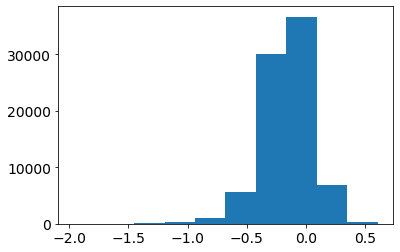

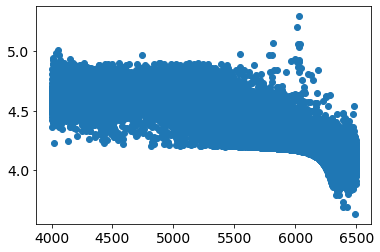

-0.07500000000000001
-0.05799999999999998
-0.047
-0.035500000000000004
stellar  201864


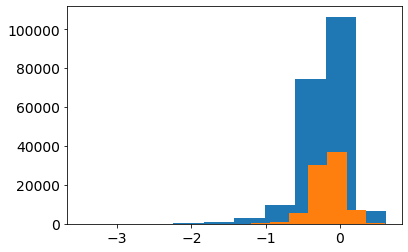

In [190]:
####Remove Really Noisy Targets####
print(len(stellar))

# stellar=stellar[stellar.Ncomp<1]
#stellar=stellar[stellar.d_mag<4]
# stellar=stellar[stellar.CDPP8<=1200]
# stellar=stellar[stellar.RUWE<1.2]


####Only Select FGK Dwarf Stars####
# stellar=stellar[(stellar.Teff<3500) &  (stellar.Teff>3000)]
stellar=stellar[(stellar.Teff>4000) & (stellar.Teff<6500)]
print(len(stellar))
stellar=stellar[stellar.logg>=1/4.671*np.arctan((stellar.Teff-6300)/-67.172)+3.876]
print(len(stellar))
# stellar=stellar[stellar.logg>=4]
# print(len(stellar))
stellar=stellar[stellar.RUWE<1.2]
print(len(stellar))
stellar=stellar[stellar.CDPP8<=1200]
print(len(stellar))
# stellar=stellar[stellar.logg<5]
# stellar=stellar[stellar.Rad<2]
# stellar=stellar[stellar.Mass<2]
# stellar=stellar[stellar.FeH<0.4]
# stellar=stellar[stellar.FeH>0.2]
print(len(stellar[stellar.U_FeH==.235]))
print(len(stellar))
####Only Select Low Metallicity Targets####
# stellar=stellar[(stellar.FeH>0.2) & (stellar.FeH<0.4)]

print(len(stellar), "Stars in Sample")
print(np.median(stellar.FeH[(stellar.FeH>0.2) & (stellar.FeH<.4)]))
# print(np.sort(stellar.FeH)[int(len(stellar)*.84)]-np.median(stellar.FeH))
# print(np.median(stellar.FeH)-np.sort(stellar.FeH)[int(len(stellar)*.16)])
plt.hist(stellar.FeH)
plt.show()
plt.scatter(stellar.Teff,stellar.logg)
plt.show()

print(np.sort(stellar.FeH[(stellar.FeH>-.4) & (stellar.FeH<-.2)])[np.int(.16*len(stellar.FeH[(stellar.FeH>-.40) & (stellar.FeH<-.2)]))]
      -np.median(stellar.FeH[(stellar.FeH>-.4) & (stellar.FeH<-0.2)]))

print(np.sort(stellar.FeH[(stellar.FeH>-.2) & (stellar.FeH<0)])[np.int(.16*len(stellar.FeH[(stellar.FeH>-.20) & (stellar.FeH<0.0)]))]
      -np.median(stellar.FeH[(stellar.FeH>-.2) & (stellar.FeH<-0.0)]))

print(np.sort(stellar.FeH[(stellar.FeH>-0) & (stellar.FeH<0.2)])[np.int(.16*len(stellar.FeH[(stellar.FeH>0) & (stellar.FeH<0.2)]))]
      -np.median(stellar.FeH[(stellar.FeH>-0) & (stellar.FeH<0.2)]))

print(np.sort(stellar.FeH[(stellar.FeH>.2) & (stellar.FeH<0.4)])[np.int(.16*len(stellar.FeH[(stellar.FeH>.20) & (stellar.FeH<0.4)]))]
      -np.median(stellar.FeH[(stellar.FeH>.2) & (stellar.FeH<0.4)]))

stellarOG=stellarOG[~stellarOG['EPIC'].isin(stellar.EPIC.values.tolist())]
print("stellar ",str(len(stellarOG)))
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('k2Star2.pdf')as pdf:
    plt.rcParams.update({'font.size': 14})
    im2=plt.scatter(stellarOG.Teff,stellarOG.logg, c="grey", s=.02, alpha=.05, rasterized=True)
    im=plt.scatter(stellar.Teff,stellar.logg, c=stellar['[Fe/H]'], s=.04, alpha=.2, cmap='viridis', vmin=-2,vmax=0.6, rasterized=True)

    plt.ylim(5.25, 3)
    plt.xlim(7000, 3500)
    plt.text(6900,3.05, "K2", horizontalalignment="left",verticalalignment='top', color="black", fontsize=16)


    plt.ylabel("$\log g$")
    plt.xlabel("$T_{\mathrm{eff}}$ [K]")
    cbar =plt.colorbar(im)
    cbar.set_label("[Fe/H]")
    cbar.set_alpha(1)
    cbar.draw_all()
    pdf.savefig(bbox_inches = "tight", dpi=300)
    plt.close()
    
    
plt.hist(stellarOG.FeH)
plt.hist(stellar.FeH)
plt.show()

    
# with PdfPages('k2StarMetal.pdf')as pdf:
#     plt.rcParams.update({'font.size': 14})
#     im2=plt.scatter(stellarOG.Teff,stellarOG.logg, c="grey", s=.02, alpha=.05, rasterized=True)
#     im=plt.scatter(stellar.Teff,stellar.logg, c=stellar['[Fe/H]'], s=.04, alpha=.2, cmap='viridis', vmin=-2,vmax=0.6, rasterized=True)

#     plt.ylim(5.25, 3)
#     plt.xlim(7000, 3500)
#     plt.text(6900,3.05, "K2", horizontalalignment="left",verticalalignment='top', color="black", fontsize=16)


#     plt.ylabel("$\log g$")
#     plt.xlabel("$T_{\mathrm{eff}}$ [K]")
#     cbar =plt.colorbar(im)
#     cbar.set_label("[Fe/H]")
#     cbar.set_alpha(1)
#     cbar.draw_all()
#     pdf.savefig(bbox_inches = "tight", dpi=300)
#     plt.close()    

In [76]:
###KEPLER STARS
stellarkep=pd.read_csv("stellar_samples_kepler.csv",sep=",", engine='python', header=0)
LAMOST=pd.read_csv("lamostClean.csv",sep=",", engine='python', header=0)
stellarkep=pd.merge(stellarkep,LAMOST[["KIC", 'FeH', 'U_FeH',"logg","U_logg"]], on="KIC", how="left")

from astropy.stats import mad_std
# print(steFeH[np.isfinite(steFeH)])
# print(len(steFeH[np.isfinite(steFeH)]))
# print(len(lamFeH[np.isfinite(lamFeH)]))
steFeH=stellar["logg_x"][np.isfinite(stellar["logg_y"])]
lamFeH=stellar["logg_y"][np.isfinite(stellar["logg_y"])]
print(len(lamFeH))
# plt.scatter(steFeH,lamFeH)
# plt.xlim([0,6])
# plt.ylim([0,6])
# plt.plot([0,6],[0,6],color="red")
# plt.show()
diff=steFeH-lamFeH


print(np.median(diff))
print(mad_std(diff))
# diff=diff[abs(diff)<1]
# plt.hist(diff)
# plt.xlim([-2.5,1])

stellarkep["FeH"]=np.where(np.isfinite(stellarkep["FeH_y"]),stellarkep["FeH_y"],stellarkep.FeH_x)
stellarkep["U_FeH"]=np.where(np.isfinite(stellarkep["U_FeH_y"]),stellarkep["U_FeH_y"],stellarkep.U_FeH_x)
stellarkep["logg"]=np.where(np.isfinite(stellarkep["logg_y"]),stellarkep["logg_y"],stellarkep.logg_x)
stellarkep["U_logg"]=np.where(np.isfinite(stellarkep["U_logg_y"]),stellarkep["U_logg_y"],stellarkep.U_logg_x)
# stellar=stellar.drop(['FeH_y','FeH_x',"logg_y","logg_x","U_FeH_y","U_FeH_x","U_logg_x","U_logg_y"], axis=1)
print(len(stellarkep))
stellarkep=stellarkep[(stellarkep.Teff>4000) &  (stellarkep.Teff<6500)]
stellarkep=stellarkep[stellarkep.logg>=1/4.671*np.arctan((stellarkep.Teff-6300)/-67.172)+3.876]
stellarkep=stellarkep[stellarkep.RUWE<1.2]
stellarkep=stellarkep[stellarkep.CDPP7_5<=1000]


34395
-0.001999923706054396
0.04447795344159575
223915


In [146]:

with PdfPages('K2KepMet.pdf')as pdf:
    
    plt.rcParams.update({'font.size': 14})
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.hist(stellarkep.FeH[(stellarkep.FeH<.6) &( stellarkep.FeH>-1.5)],bins=25,color="#39558C")
    plt.hist(stellar.FeH[(stellar.FeH<.6) &( stellar.FeH>-1.5)],bins=25,alpha=.75,color="#73D055")
    plt.xlabel("[Fe/H]")
    plt.ylabel("Number of Stars [k]")
    plt.yticks([0,10000, 20000, 30000,40000], ['0',"10", "20", "30", "40"])
    plt.xlim([-1.5,.6])
    plt.ylim([0,40000])
    ax.set_aspect((.6+1.5)/40000)
    pdf.savefig(bbox_inches = "tight", dpi=300)
    plt.close()
print(np.median(stellarkep.FeH))
print(mad_std(stellarkep.FeH))
print(np.median(stellar.FeH))
print(mad_std(stellar.FeH))  
    
with PdfPages('K2KepMass.pdf')as pdf:
    
    plt.rcParams.update({'font.size': 14})
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.hist(stellarkep.Mass[(stellarkep.Mass<2.25)],bins=25,color="#39558C")
    plt.hist(stellar.Mass[(stellar.Mass<2.25)],bins=25,alpha=.75,color="#73D055")
    plt.xlabel("Mass [$M_{\odot}$]")
    plt.ylabel("Number of Stars [k]")
    plt.yticks([0,5000, 10000, 15000,20000], ['0',"5", "10", "15", "20"])
    plt.xlim([0,2.25])
    plt.ylim([0,20000])
    ax.set_aspect((2.25)/20000)
    pdf.savefig(bbox_inches = "tight", dpi=300)
    plt.close()

    
print(np.median(stellarkep.Mass))
print(mad_std(stellarkep.Mass))
print(np.median(stellar.Mass))
print(mad_std(stellar.Mass)) 

with PdfPages('K2KepRad.pdf')as pdf:
    
    plt.rcParams.update({'font.size': 14})
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.hist(stellarkep.Rad[(stellarkep.Rad<3)],bins=25,color="#39558C")
    plt.hist(stellar.Rad[(stellar.Rad<3)],bins=25,alpha=.75,color="#73D055")
    plt.xlabel("Radius [$R_{\odot}$]")
    plt.ylabel("Number of Stars [k]")
    plt.yticks([0,5000, 10000, 15000,20000,25000], ['0',"5", "10", "15", "20","25"])
    plt.xlim([0.5,3])
    plt.ylim([0,25000])
    ax.set_aspect((3-.5)/25000)
    pdf.savefig(bbox_inches = "tight", dpi=300)
    plt.close()
    
print(np.median(stellarkep.Rad))
print(mad_std(stellarkep.Rad))
print(np.median(stellar.Rad))
print(mad_std(stellar.Rad))       

with PdfPages('K2KepTeff.pdf')as pdf:
    
    plt.rcParams.update({'font.size': 14})
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.hist(stellarkep.Teff,bins=25,color="#39558C")
    plt.hist(stellar.Teff,bins=25,alpha=.75,color="#73D055")
    plt.xlabel("$T_{\mathrm{eff}}$ [K]")
    plt.ylabel("Number of Stars [k]")
    plt.yticks([0,3000,6000,9000 ], ['0',"3", "6", "9"])
    plt.xlim([4000,6500])
    plt.ylim([0,9000])
    ax.set_aspect((6500-4000)/9000)
    pdf.savefig(bbox_inches = "tight", dpi=300)
    plt.close()
print(np.median(stellarkep.Teff))
print(mad_std(stellarkep.Teff))
print(np.median(stellar.Teff))
print(mad_std(stellar.Teff))      

with PdfPages('K2Keplogg.pdf')as pdf:
    
    plt.rcParams.update({'font.size': 14})
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.hist(stellarkep.logg,bins=25,color="#39558C")
    plt.hist(stellar.logg,bins=25,alpha=.75,color="#73D055")
    plt.xlabel("$\log g$")
    plt.ylabel("Number of Stars [k]")
    plt.yticks([0,5000, 10000, 15000,20000], ['0',"5", "10", "15", "20"])
    plt.xlim([3.5,5])
    plt.ylim([0,20000])
    ax.set_aspect((5-3.5)/20000)
    pdf.savefig(bbox_inches = "tight", dpi=300)
    plt.close()      
        
    


-0.012
0.08895613311033612
-0.14800000000000002
0.17642966400216667
0.956
0.17642966400216664
0.895
0.1645688462541218
1.015
0.28169442151606466
0.888
0.25352497936445784
5705.3
550.1936832874281
5413.0
704.236053790161


AttributeError: 'DataFrame' object has no attribute 'dec'

In [109]:
# from astropy.stats import mad_std
# # print(steFeH[np.isfinite(steFeH)])
# # print(len(steFeH[np.isfinite(steFeH)]))
# # print(len(lamFeH[np.isfinite(lamFeH)]))
# steFeH=stellar["FeH"][np.isfinite(stellar["[Fe/H]"])]
# lamFeH=stellar["[Fe/H]"][np.isfinite(stellar["[Fe/H]"])]
# plt.scatter(stellar["[Fe/H]"][np.isfinite(stellar["[Fe/H]"])],stellar["FeH"][np.isfinite(stellar["[Fe/H]"])])
# plt.xlim([-2.5,1])
# plt.ylim([-2.5,1])
# plt.plot([-2.5,1],[-2.5,1],color="red")
# plt.show()
# diff=steFeH-lamFeH

# print(np.median(diff))
# print(mad_std(diff))
# diff=diff[abs(diff)<1]
# plt.hist(diff)
# # plt.xlim([-2.5,1])

In [128]:
with PdfPages('k2fieldMetals.pdf')as pdf:
    plt.rcParams.update({'font.size': 14})
    plt.hist(stellar.FeH, bins=25, color="#453781")
    plt.hist(stellar[np.isfinite(stellar["[Fe/H]"])]["[Fe/H]"], bins=25, color="#3CBB75")
    plt.text(-.96,.96*20000, "Field", horizontalalignment="left",verticalalignment='top', color="#453781", fontsize=16)
    plt.text(-.96,.88*20000, "LAMOST", horizontalalignment="left",verticalalignment='top', color="#3CBB75", fontsize=16)
    plt.text(.46,.96*20000, "K2", horizontalalignment="right",verticalalignment='top', color="black", fontsize=16)
    plt.xlabel("[Fe/H]")
    plt.ylabel("Number of Stars")
    plt.xlim([-1.,.5])
    plt.ylim([0,20000])
    pdf.savefig(bbox_inches = "tight", dpi=300)
    plt.close()

In [142]:

with PdfPages('k2fieldLAMOST.pdf')as pdf:
    plt.rcParams.update({'font.size': 14})
    xvalue=np.arange(-1,1,.01)
    print(mad_std(stellar[np.isfinite(stellar["[Fe/H]"])]["FeH"]-stellar[np.isfinite(stellar["[Fe/H]"])]["[Fe/H]"]))
    print(np.mean(stellar[np.isfinite(stellar["[Fe/H]"])]["FeH"]-stellar[np.isfinite(stellar["[Fe/H]"])]["[Fe/H]"]))
    plt.scatter(stellar[np.isfinite(stellar["[Fe/H]"])]["FeH"],stellar[np.isfinite(stellar["[Fe/H]"])]["[Fe/H]"], color="#453781", alpha =.1, s=5, rasterized=True)
    plt.plot(xvalue,xvalue-(np.median(stellar[np.isfinite(stellar["[Fe/H]"])]["FeH"]-stellar[np.isfinite(stellar["[Fe/H]"])]["[Fe/H]"])), color="#3CBB75")
    plt.text(-.96,.45, "Offset = -0.002", horizontalalignment="left",verticalalignment='top', color="black", fontsize=16)
    plt.text(-.96,.3, "RMS = 0.064", horizontalalignment="left",verticalalignment='top', color="black", fontsize=16)
    # plt.text(-.96,40000*.88, "LAMOST", horizontalalignment="left",verticalalignment='top', color="#3CBB75", fontsize=16)
    plt.text(.46,-.96, "K2", horizontalalignment="right",verticalalignment='bottom', color="black", fontsize=16)


    plt.xlabel("HU20 [Fe/H]")
    plt.ylabel("LAMOST [Fe/H]")
    plt.xlim([-1.,.5])
    plt.ylim([-1.,.5])
# plt.ylim([0,40000])
    pdf.savefig(bbox_inches = "tight", dpi=300)
    plt.close()

0.06375190334903896
0.00040875813789574246


### We must now provide ExoMult with the population input parameters.
 <b>pMax</b> and <b>pMin</b> - Period distribution limits. 
<br> <b>rMax</b> and <b>rMin</b> - Radius distribution limits.
<br>
<br>ExoMult assums a broken power-law distribution in both period and radius space. 
<br> <b>alpha_1</b> and <b>alpha_2</b> - Radius distribution powers.
<br> <b>rad_break</b> - Location of the break between the defined powers.
<br>
<br> <b>beta_1</b> and <b>beta_2</b> - Period distribution powers.
<br> <b>rad_break</b> - Location of the break between the defined powers.
<br> 
<br> <b>mut_Ray</b> - Magnitude of mutual inclination between planets in a fixed system. A 0 here assumes a perfectly flat disk.
<br>
<br>ExoMult does not assume a system multiplicity distribution, it requires you manually input the fraction of stars with at least one planet (<b>frac_m1</b>), at least two planets (<b>frac_m2</b>), and so forth.
<br>
<br>In the provided example I created a variable call <b>occurFact</b>. This can be considered the overall occurrence factor or the number planets expected per star. If you use the code that follows it will just max out each multiplicity order (i.e., <b>occurFact = 2.5</b> means that 100% of the stars have two planets and 50% have three).

In [4]:
params = ExoMult.PopParams(stellar=stellar)

####Distribution Limits####
params.pMax=40 #days
params.pMin=0.5 #days
params.rMax=6 #Earth Radii
params.rMin=0.5 #Earth Radii

####Kepler Distribtuion Shape####
params.alpha_1=-1.61
params.rad_break=3.03 #Earth Radii
params.alpha_2=-6.56
params.beta_1=0.91
params.per_break=6.83  #days
params.beta_2=-0.59
params.mut_Ray=0 #degrees

####Occurrence Factor (Number of Planets Per Star)####
occurFact=2.5

params.frac_m1=occurFact
params.frac_m2=params.frac_m1-1
params.frac_m3=params.frac_m2-1
params.frac_m4=params.frac_m3-1
params.frac_m5=params.frac_m4-1

Now that we have all the inputs defined we can run ExoMult.
<br> However, let's first turn on <b>prettyPrint</b>. This will just give provide a little insight into what is happening under the hood.  

In [5]:
params.prettyPrint=True
outputPopulation=ExoMult.Simulate(params)
print(len(outputPopulation), "Expected Obs. Hosting Targets")
print(np.sum(outputPopulation.m), "Expected Obs. Planet Candidates")

Drawing exoplanet population from broken power-law distribution
Applying population completeness corrections for K2
----- Removing non-transiting exoplanets
----- Removing undetected exoplanets
Drawing planet radii from stellar uncertainties
----- Reasserting maximum radius threshold
144 Expected Obs. Hosting Targets
165 Expected Obs. Planet Candidates


<br><br><br>Now that have the output population, we can look at the expected observated radius and period distribution given our input parameters.

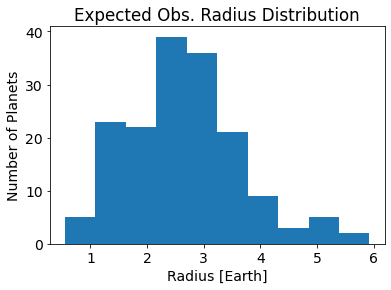

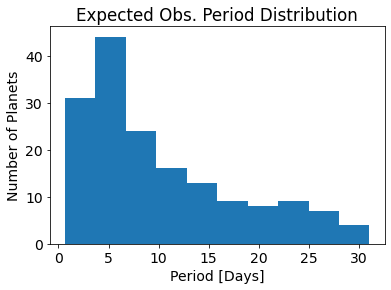

In [6]:
plt.hist(np.concatenate([outputPopulation.rad_m1[outputPopulation.rad_m1>0],
                         outputPopulation.rad_m2[outputPopulation.rad_m2>0],
                         outputPopulation.rad_m3[outputPopulation.rad_m3>0]], axis=0))
plt.title("Expected Obs. Radius Distribution")
plt.ylabel("Number of Planets")
plt.xlabel("Radius [Earth]")
plt.show()

plt.hist(np.concatenate([outputPopulation.per_m1[outputPopulation.rad_m1>0],
                         outputPopulation.per_m2[outputPopulation.rad_m2>0],
                         outputPopulation.per_m3[outputPopulation.rad_m3>0]], axis=0))
plt.title("Expected Obs. Period Distribution")
plt.ylabel("Number of Planets")
plt.xlabel("Period [Days]")
plt.show()

Ok, let's try it again, but with a flat distribution in period and radius.

In [7]:
params = ExoMult.PopParams(stellar=stellar)
params.pMax=40
params.pMin=0.5
params.rMax=6
params.rMin=0.5 

#### Flat Period and Radius distribution ###
params.alpha_1=0
params.rad_break=2
params.alpha_2=0
params.beta_1=0
params.per_break=10
params.beta_2=0
params.mut_Ray=0

occurFact=2.5
params.frac_m1=occurFact
params.frac_m2=params.frac_m1-1
params.frac_m3=params.frac_m2-1
params.frac_m4=params.frac_m3-1
params.frac_m5=params.frac_m4-1

Note: I am not going to turn on <b>prettyPrint</b> because it just gets in the way.

In [8]:
outputPopulation=ExoMult.Simulate(params)
print(len(outputPopulation), "Expected Obs. Hosting Targets")
print(np.sum(outputPopulation.m), "Expected Obs. Planet Candidates")

474 Expected Obs. Hosting Targets
740 Expected Obs. Planet Candidates


#### Clearly, a flat distribution yields a lot more planets.
<br> Let's take a quick look at the output period and radius distributions. We should expect them to look different given our flat input distribution.

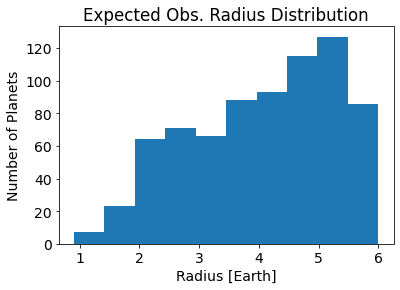

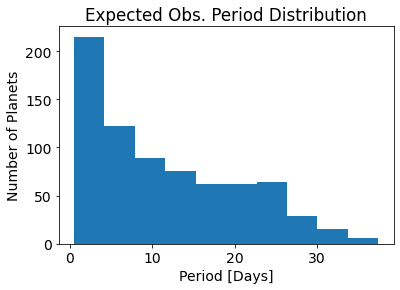

In [9]:
plt.hist(np.concatenate([outputPopulation.rad_m1[outputPopulation.rad_m1>0],
                         outputPopulation.rad_m2[outputPopulation.rad_m2>0],
                         outputPopulation.rad_m3[outputPopulation.rad_m3>0]], axis=0))
plt.title("Expected Obs. Radius Distribution")
plt.ylabel("Number of Planets")
plt.xlabel("Radius [Earth]")
plt.show()

plt.hist(np.concatenate([outputPopulation.per_m1[outputPopulation.rad_m1>0],
                         outputPopulation.per_m2[outputPopulation.rad_m2>0],
                         outputPopulation.per_m3[outputPopulation.rad_m3>0]], axis=0))
plt.title("Expected Obs. Period Distribution")
plt.ylabel("Number of Planets")
plt.xlabel("Period [Days]")
plt.show()

In [244]:
import emcee
from scipy import stats
from scipy.special import gamma, factorial
from scipy.stats import norm, uniform, beta, poisson, binom, binned_statistic
planet=pd.read_csv("planet_sample.csv",sep=",", engine='python', header=0)
planet=planet[planet['EPIC'].isin(stellar.EPIC.values.tolist())]
print(len(planet))
planet=planet.drop_duplicates(["CAND"])
planet=planet[(planet.Rad>1) & (planet.Rad<4)]
print(len(planet))
# planet=planet[planet['EPIC'].isin(stellar.EPIC.values.tolist())]
# planet=pd.merge(planet,stellar[["EPIC", "FeH", "U_FeH","k2_kepmag"]], on="EPIC", how="left")

# planet.FeH=planet["FeH_y"]

# planet=planet.drop_duplicates(["CAND"])
# # planet["FeH"]=planet["FeH_y"]
# plt.scatter(planet.Rad,1/planet.MajAxis**2*215**2*(planet.Teff/5700)**4)
# plt.yscale('log')
# # plt.ylim([500,2500])
# plt.xlim([0,30])
# planetNew=planet[1/planet.MajAxis**2*215**2*(planet.Teff/5700)**4>1e3]

perBr=np.arange(.5,40)
radBr=10**(-0.09*np.log10(perBr) + 0.37)
with PdfPages('k2planet.pdf')as pdf:
    plt.rcParams.update({'font.size': 14})
    plt.scatter(planet.Period[(np.log10(planet.Rad)<-0.09*np.log10(planet.Period) + 0.37)],planet.Rad[(np.log10(planet.Rad)<-0.09*np.log10(planet.Period) + 0.37)], color="#43AF7F", s=20)
    plt.scatter(planet.Period[(np.log10(planet.Rad)>-0.09*np.log10(planet.Period) + 0.37) & (planet.Rad<4)],planet.Rad[(np.log10(planet.Rad)>-0.09*np.log10(planet.Period) + 0.37)& (planet.Rad<4)],color="#39558C", s=20)
    plt.plot(perBr,radBr, color= "grey", ls=":")
    plt.xlim([.5,40])
    plt.ylim([1,4])
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Period [days]')
    plt.ylabel("Radius [$R_{\oplus}$]")
    plt.yticks([1, 2, 3,4], ['1', "2", "3", "4"])
    plt.xticks([ 1,3, 10,30], ['1', "3", "10", "30"])
    pdf.savefig(bbox_inches = "tight", dpi=300)
    plt.close()
print(len(planet.Period[(np.log10(planet.Rad)<-0.09*np.log10(planet.Period) + 0.37)]))
print(len(planet.Period[(np.log10(planet.Rad)>-0.09*np.log10(planet.Period) + 0.37)]))
# plt.scatter(planet.Period[(planet.Rad>1) & (planet.Rad<1.8)],planet.Rad[(planet.Rad>1)& (planet.Rad<1.8)])
# plt.scatter(planet.Period[(planet.Rad>1.8) & (planet.Rad<4)],planet.Rad[(planet.Rad>1.8)& (planet.Rad<4)])
# plt.scatter(planet.Period[(planet.Rad>8)],planet.Rad[(planet.Rad>8)])

# plt.scatter(planet.Period[(planet.Rad>4) & (planet.Rad<8)],planet.Rad[(planet.Rad>4)& (planet.Rad<8)])


391
283
69
214


In [29]:
planetNew[(planetNew.Rad>6) & (planetNew.Rad<30) & (planetNew.b<.8)]


,EPIC,CAMP,CAND,MULT,Score,Period,u_Period,U_Period,Ratio,u_Ratio,...,M*,u_M*,U_M*,Teff,u_Teff,logg,u_logg,FeH,u_FeH,SpT
31,203776696,2,2.037767e+08,0,0.90,3.535323,0.000090,0.000086,0.075440,0.001043,...,2.143,0.678,1.043,6177,138,4.118,0.150,-0.330,0.235,F2
40,204748201,2,2.047482e+08,0,0.68,3.682157,0.000029,0.000031,0.109754,0.000237,...,0.893,0.279,0.400,6021,138,4.241,0.150,-0.460,0.235,G0
161,210958990,4,2.109590e+08,0,0.98,1.702324,0.000023,0.000023,0.149780,0.001425,...,1.726,0.197,0.211,6256,26,4.359,0.043,0.160,0.025,F8
165,211002562,4,2.110026e+08,0,0.98,3.347857,0.000033,0.000033,0.115895,0.000745,...,1.491,0.465,0.663,5826,138,3.939,0.150,-0.259,0.235,G0
286,212688722,6,2.126887e+08,0,0.80,5.734172,0.001401,0.000787,0.020669,0.001015,...,1.147,0.371,0.525,5192,138,3.618,0.150,-0.447,0.235,G8
327,217671466,7,2.176715e+08,0,0.86,1.915295,0.000006,0.000006,0.090127,0.000207,...,1.157,0.357,0.514,5621,138,4.150,0.150,0.000,0.235,G4
329,218131080,7,2.181311e+08,0,0.98,3.142733,0.000015,0.000015,0.063973,0.000164,...,0.639,0.218,0.343,6119,138,4.349,0.150,-0.355,0.235,F2
448,246331347,12,2.463313e+08,0,0.82,1.082361,0.000052,0.000057,0.038088,0.001916,...,1.159,0.351,0.530,5556,138,4.032,0.150,-0.376,0.235,G7
474,246911830,13,2.469118e+08,0,0.82,2.626702,0.000007,0.000007,0.098947,0.000151,...,1.376,0.422,0.591,6692,138,4.107,0.150,-0.098,0.235,F3
488,247281516,13,2.472815e+08,0,0.78,6.770834,0.000025,0.000026,0.103924,0.000145,...,1.895,0.593,0.809,6310,138,4.014,0.150,-0.021,0.235,F5


In [201]:
###### Planets only in Samaple ###
planet=planet[planet['EPIC'].isin(stellar.EPIC.values.tolist())]
planet=planet.drop_duplicates(["CAND"])

planet=planet[(planet.Period>.5) & (planet.Period<50)]
planet=planet[(planet.Rad<4) & (planet.Rad>.5)]

print(len(planet), "Planet Candidates Observed")

params = ExoMult.PopParams(stellar=stellar)

####Distribution Limits####
params.pMax=50 #days
params.pMin=0.5 #days
params.rMax=4 #Earth Radii
params.rMin=0.5 #Earth Radii

####Kepler Distribtuion Shape####
# params.alpha_1=-0.8416112186408303
# # params.alpha_1=-10
# # params.rad_break=3.03 #Earth Radii
# params.rad_break=1.8 #Earth Radii
# params.alpha_2=-10
# # params.alpha_2=-2.5
# # params.alpha_2=-8
# params.beta_1=0.7425142511899641
# # params.beta_1=.5
# params.per_break=10.065194185750743  #days
# # params.per_break=10  #days
# params.beta_2=-0.1775957773311858
params.mut_Ray=0 #degrees

# params.alpha_1=-0.5717755446364347
# params.rad_break=1 #Earth Radii
# params.alpha_2=-0.5717755446364347
# params.beta_1=0.9099833959997778
# params.per_break=6.574778525573955  #days
# params.beta_2=-0.7864727916655461

# params.alpha_1=-1.0001
params.rad_break=1.8 #Earth Radii
# params.alpha_2=-1.0001
# params.beta_1=-1.0001
#params.per_break=10  #days
# params.beta_2=-1.0001
params.mut_Ray=0 #degrees

####Occurrence Factor (Number of Planets Per Star)####
occurFact=2.55471253258464

params.frac_m1=occurFact
params.frac_m2=params.frac_m1-1
params.frac_m3=params.frac_m2-1
params.frac_m4=params.frac_m3-1
params.frac_m5=params.frac_m4-1
outputPopulation=ExoMult.Simulate(params)
print(np.sum(outputPopulation.m), "Expected Obs. Planet Candidates")



93 Planet Candidates Observed
109 Expected Obs. Planet Candidates


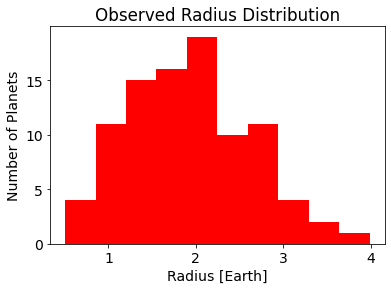

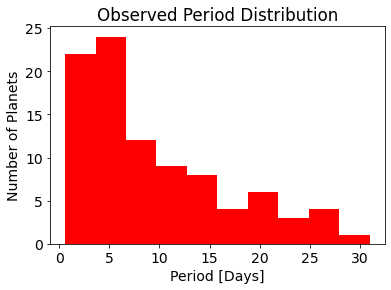

In [194]:
plt.hist(planet.Rad, color="Red")
plt.title("Observed Radius Distribution")
plt.ylabel("Number of Planets")
plt.xlabel("Radius [Earth]")
plt.show()
plt.hist(planet.Period, color="Red")
plt.title("Observed Period Distribution")
plt.ylabel("Number of Planets")
plt.xlabel("Period [Days]")
plt.show()

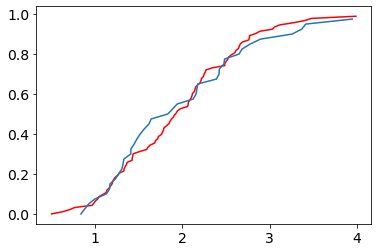

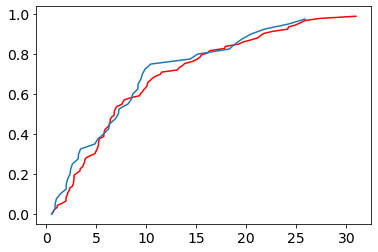

-0.7750962156775406
-0.47639231038615565


In [195]:
radiusObs = np.sort(planet.Rad)
periodObs = np.sort(planet.Period)
covarObs=(planet.Rad-np.mean(planet.Rad))*(planet.Period-np.mean(planet.Period))
covarObs=np.sort(covarObs)
# radiusExp=np.sort(np.concatenate([outputPopulation.rad_m1[outputPopulation.rad_m1>0],
#                          outputPopulation.rad_m2[outputPopulation.rad_m2>0],
#                          outputPopulation.rad_m3[outputPopulation.rad_m3>0]], axis=0))
# periodExp=np.sort(np.concatenate([outputPopulation.per_m1[outputPopulation.rad_m1>0],
#                          outputPopulation.per_m2[outputPopulation.rad_m2>0],
#                          outputPopulation.per_m3[outputPopulation.rad_m3>0]], axis=0))

radiusExp=np.sort(outputPopulation.rad_m1[outputPopulation.rad_m1>0])
periodExp=np.sort(outputPopulation.per_m1[outputPopulation.rad_m1>0])
covar=(outputPopulation.rad_m1[outputPopulation.rad_m1>0]-np.mean(outputPopulation.rad_m1[outputPopulation.rad_m1>0]))*(outputPopulation.per_m1[outputPopulation.rad_m1>0]-np.mean(outputPopulation.per_m1[outputPopulation.rad_m1>0]))
covar=np.sort(covar)

yObs = np.arange(len(radiusObs)) / float(len(radiusObs))

yExp = np.arange(len(radiusExp)) / float(len(radiusExp))

plt.plot(radiusObs,yObs, color="red", label="Obs. Planets")
plt.plot(radiusExp,yExp, label="Exp. Planets")
plt.show()
# plt.plot(covarObs,yObs,color="red", label="Obs. Planets")
# plt.plot(covar,yExp, label="Exp. Planets")
plt.plot(periodObs,yObs,color="red", label="Obs. Planets")
plt.plot(periodExp,yExp, label="Exp. Planets")
plt.show()

pv_rad=stats.anderson_ksamp([radiusObs,radiusExp]).statistic
pv_per=stats.anderson_ksamp([periodObs,periodExp]).statistic

print(pv_rad)
print(pv_per)

In [196]:
from scipy.special import gamma, factorial
# from scipy.stats import norm, uniform, beta, poisson, binom, binned_statistic
def logSamePois(x1,x2):
    if (x1==0) | (x2==0):
        return(np.log(2**(-x1-x2-1)*gamma(x1+x2+1)/(factorial(x1)* factorial(x2))))
    else:
        return(np.log(2)*(-x1-x2-1)+(x1+x2)*np.log((x1+x2))-(x1+x2)-x1*np.log(x1)+x1-x2*np.log(x2)+x2)
        

likelihood=logSamePois(10,9)#-pv_rad-pv_per
print(likelihood)

-0.7194751330029803


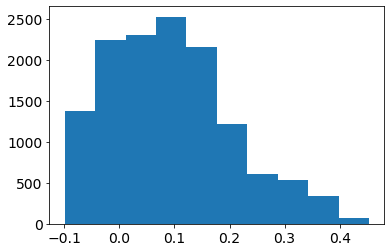

In [198]:
samplesSuperEarths_Kepler=pd.read_csv("./Kepler_chains/SuperEarths.csv", delimiter=",", names=["occurFact", "Alpha", "Beta_1","Per_Break","Beta_2"])

alp=np.median(samplesSuperEarths_Kepler.Alpha)
aCon=np.median(samplesSuperEarths_Kepler.Beta_1)
bCon=np.median(samplesSuperEarths_Kepler.Beta_2)
xmix=np.median(samplesSuperEarths_Kepler.Per_Break)

low_alp=alp-np.sort(samplesSuperEarths_Kepler.Alpha)[int(len(samplesSuperEarths_Kepler)*.16)]
low_aCon=aCon-np.sort(samplesSuperEarths_Kepler.Beta_1)[int(len(samplesSuperEarths_Kepler)*.16)]
low_bCon=bCon-np.sort(samplesSuperEarths_Kepler.Beta_2)[int(len(samplesSuperEarths_Kepler)*.16)]
low_xmix=xmix-np.sort(samplesSuperEarths_Kepler.Per_Break)[int(len(samplesSuperEarths_Kepler)*.16)]

high_alp=np.sort(samplesSuperEarths_Kepler.Alpha)[int(len(samplesSuperEarths_Kepler)*.84)]-alp
high_aCon=np.sort(samplesSuperEarths_Kepler.Beta_1)[int(len(samplesSuperEarths_Kepler)*.84)]-aCon
high_bCon=np.sort(samplesSuperEarths_Kepler.Beta_2)[int(len(samplesSuperEarths_Kepler)*.84)]-bCon
high_xmix=np.sort(samplesSuperEarths_Kepler.Per_Break)[int(len(samplesSuperEarths_Kepler)*.84)]-xmix
plt.hist(stellar.FeH[stellar.FeH>-.1])


ndim = 1
nwalkers = 20
pos_min = np.array([0])#,-2,0,5,0])
pos_max = np.array([.4])#,-1,1,7,2])
psize = pos_max - pos_min
pos = [pos_min + psize*np.random.rand(ndim) for i in range(nwalkers)]

def lnprior(theta):
    a1=theta
# Alpha = -0.456132743382628 +0.3614233955323064 -0.40044242082158854
# Beta_1 = 0.6758748895276029 +0.2572448739820613 -0.18938929791474807
# Per Break = 7.474210034413118 +3.097912497636986 -1.8531438811980516
# Beta_2 = -1.02749185905701 +0.3170930465170043 -0.6431590758031733
    occurPrior=uniform.pdf(a1,0,5)
#     alphaPrior=np.where(a2>alp  ,-((a2-alp)/high_alp)**2,-((a2-alp)/low_alp)**2)
#     beta1Prior=np.where(a3>aCon ,-((a3-aCon )/high_aCon)**2,-((a3-aCon)/low_aCon)**2)
#     perBreakPrior=np.where(a4>xmix,-((a4-xmix)/high_xmix)**2,-((a4-xmix)/low_xmix)**2)
#     beta2Prior=np.where(a5>bCon,-((a5-bCon)/high_bCon)**2,-((a5-bCon)/low_bCon)**2)
#     alphaPrior=uniform.pdf(a2,-20,40)
#     beta1Prior=uniform.pdf(a3,-20,40)
#     perBreakPrior=uniform.pdf(a4,0,20)
#     beta2Prior=uniform.pdf(a5,-20,40)
    return(np.log(occurPrior))#+alphaPrior/2+beta1Prior/2+perBreakPrior/2+beta2Prior/2)
#     return(np.log(occurPrior)+np.log(alphaPrior)+np.log(beta1Prior)+np.log(beta2Prior)-(a4-10)**2)
#     return(np.log(occurPrior)-((a2+0.6021775825595477)/0.33)**2-((a3-0.73389770663693)/0.24)**2-((a4-6.565839465395051)/2)**2-((a5+0.8995804978719887)/0.3)**2)


def lnlike(theta, x, y):
    a1=theta
    
    multAmp=25
    stellarMult=stellar.sample(n=multAmp*len(stellar), replace=True)
    params = ExoMult.PopParams(stellar=stellarMult)
    
    ####Distribution Limits####
    params.pMax=40 #days
    params.pMin=0.5 #days
    params.rMax=4 #Earth Radii
    params.rMin=0.5 #Earth Radii

    ####Kepler Distribtuion Shape####
    params.alpha_1=alp
    params.rad_break=1.8 #Earth Radii
#     params.alpha_2=alp
#     params.beta_1=aCon
#     params.per_break=10  #days
#     params.beta_2=aCon
    params.mut_Ray=0 #degrees
    
    ####Occurrence Factor (Number of Planets Per Star)####
    occurFact=a1

    params.frac_m1=occurFact
    params.frac_m2=params.frac_m1-1
    params.frac_m3=params.frac_m2-1
    params.frac_m4=params.frac_m3-1
    params.frac_m5=params.frac_m4-1


    outputPopulation=ExoMult.Simulate(params)
    if np.max(outputPopulation.m)==1:
        radiusExp=np.sort(outputPopulation.rad_m1[outputPopulation.rad_m1>0])
        periodExp=np.sort(outputPopulation.per_m1[outputPopulation.rad_m1>0])
        
    elif np.max(outputPopulation.m)==2:
        radiusExp=np.sort(np.concatenate([outputPopulation.rad_m1[outputPopulation.rad_m1>0],
                         outputPopulation.rad_m2[outputPopulation.rad_m2>0]], axis=0))
        periodExp=np.sort(np.concatenate([outputPopulation.per_m1[outputPopulation.rad_m1>0],
                         outputPopulation.per_m2[outputPopulation.rad_m2>0]], axis=0))
    elif np.max(outputPopulation.m)==3:
        radiusExp=np.sort(np.concatenate([outputPopulation.rad_m1[outputPopulation.rad_m1>0],
                         outputPopulation.rad_m2[outputPopulation.rad_m2>0],
                         outputPopulation.rad_m3[outputPopulation.rad_m3>0]],axis=0))
        periodExp=np.sort(np.concatenate([outputPopulation.per_m1[outputPopulation.rad_m1>0],
                         outputPopulation.per_m2[outputPopulation.rad_m2>0],
                         outputPopulation.per_m3[outputPopulation.rad_m3>0]], axis=0))    
        
        
#     pv_rad=stats.anderson_ksamp([planetNew.Rad,radiusExp]).statistic
#     pv_per=stats.anderson_ksamp([planetNew.Period,periodExp]).statistic
    
    likelihood=logSamePois(len(planet),len(radiusExp))#-pv_rad-pv_per
    
    return(likelihood)
    
def lnprob(theta, x, y):
    try:
        lp = lnprior(theta)
        if not np.isfinite(lp):
            return -np.inf
        else:
            lk = lnlike(theta,x, y)
        if not np.isfinite(lk):
            return -np.inf

        return lp + lk    
    except:
        return -np.inf

    

In [199]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(radiusObs, periodObs), threads=10, a=2)

nburnsteps = 100
nsteps=100

import warnings
warnings.filterwarnings('ignore')

width = 1
print("Burn In")
result=sampler.run_mcmc(pos, nburnsteps)

pos,prob,state=result
sampler.reset()

########## perform MCMC
print("True Distribution")
result=sampler.run_mcmc(pos, nsteps)
samples = sampler.flatchain

samples.shape

Burn In
True Distribution


(2000, 1)

occurFact = 1.594393647184482 +0.30680826404712325 -0.22519830307931432


(array([ 21., 153., 368., 546., 428., 218., 158.,  79.,  21.,   8.]),
 array([0.95515849, 1.12237619, 1.2895939 , 1.45681161, 1.62402932,
        1.79124702, 1.95846473, 2.12568244, 2.29290014, 2.46011785,
        2.62733556]),
 <BarContainer object of 10 artists>)

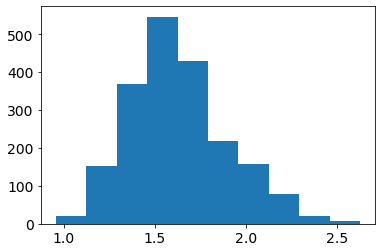

In [200]:
numsamp=len(samples[:,0])

theta=np.sort(samples[:,0])
low=np.median(theta)-theta[int(.16*numsamp)]
high=theta[int((1-.16)*numsamp)]-np.median(theta)
print("occurFact = "+str(np.median(theta))+" +"+str(high)+" -"+str(low))
plt.hist(samples[:,0])


# theta=np.sort(samples[:,1])
# low=np.median(theta)-theta[int(.16*numsamp)]
# high=theta[int((1-.16)*numsamp)]-np.median(theta)
# print("Alpha = "+str(np.median(theta))+" +"+str(high)+" -"+str(low))
# plt.hist(samples[:,1])


# theta=np.sort(samples[:,2])
# low=np.median(theta)-theta[int(.16*numsamp)]
# high=theta[int((1-.16)*numsamp)]-np.median(theta)
# print("Beta_1 = "+str(np.median(theta))+" +"+str(high)+" -"+str(low))
# plt.hist(samples[:,2])


# theta=np.sort(samples[:,3])
# low=np.median(theta)-theta[int(.16*numsamp)]
# high=theta[int((1-.16)*numsamp)]-np.median(theta)
# print("Per Break = "+str(np.median(theta))+" +"+str(high)+" -"+str(low))
# plt.hist(samples[:,3])


# theta=np.sort(samples[:,4])
# low=np.median(theta)-theta[int(.16*numsamp)]
# high=theta[int((1-.16)*numsamp)]-np.median(theta)
# print("Beta_2 = "+str(np.median(theta))+" +"+str(high)+" -"+str(low))
# plt.hist(samples[:,4])
# plt.show()

# samplesSuperEarths=samples
# samplesSubNeptunes=samples
# samplesSubSaturns=samples
# samplesJupiters=samples

# np.savetxt("./K2_chains/SuperEarths.csv", samplesSuperEarths, delimiter=",")
# np.savetxt("./K2_chains/SubNeptunes.csv", samplesSubNeptunes, delimiter=",")
# np.savetxt("./K2_chains/SubSaturns.csv", samplesSubSaturns, delimiter=",")
# np.savetxt("./K2_chains/Jupiters.csv", samplesJupiters, delimiter=",")

# np.savetxt("./K2_chains/SubNeptunes_FeH_high.csv", samplesSubNeptunes, delimiter=",")

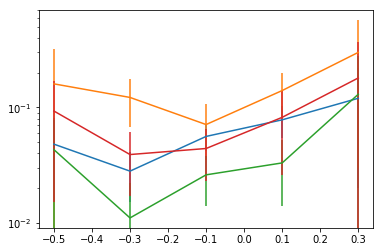

In [637]:
x=np.array([-0.5,-0.3,-0.1,0.1,0.3])
y=np.array([0.048,0.028,0.056,0.078,0.12])
yerr=np.array([0.033,0.013,0.014,0.024,0.10])

y2=np.array([0.16,0.122,0.071,0.14,0.30])
yerr2=np.array([0.16,0.055,0.036,0.06,0.27])

y3=np.array([0.043,0.011,0.026,0.033,0.13])
yerr3=np.array([0.035,0.011,0.012,0.019,0.15])

y4=np.array([0.093,0.039,0.044,0.082,0.18])
yerr4=np.array([0.078,0.022,0.021,0.056,0.19])

plt.errorbar(x,y,yerr=yerr)
plt.errorbar(x,y2,yerr=yerr2)
plt.errorbar(x,y3,yerr=yerr3)
plt.errorbar(x,y4,yerr=yerr4)
plt.yscale("log")
plt.show()

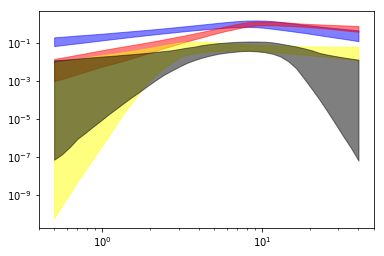

In [871]:
samples=samplesSuperEarths
aCon=samples[:,2]
bCon=samples[:,4]
xmix=samples[:,3]
xmin=.5
xmax=40
constant1=((xmix**(aCon+1)-xmin**(aCon+1))/(aCon+1)+(xmix**aCon/xmix**bCon)*(xmax**(bCon+1)-xmix**(bCon+1))/(bCon+1))**-1
constant2=constant1*(xmix**aCon/xmix**bCon)
def model(x):
    y=np.where(x<xmix,constant1*samples[:,0]*x**aCon,constant2*samples[:,0]*x**bCon)
    return(y)

xvar=np.logspace(np.log10(xmin),np.log10(xmax),40)
y=np.zeros(len(xvar))
u_y=np.zeros(len(xvar))
U_y=np.zeros(len(xvar))
for i in range(len(xvar)):
    y[i]=np.median(model(xvar[i]))
    u_y[i]=y[i]-np.sort(model(xvar[i]))[int(.16*len(model(xvar[i])))]
    U_y[i]=np.sort(model(xvar[i]))[int(.84*len(model(xvar[i])))]-y[i]
plt.fill_between(xvar,-u_y*100+y*100,y*100+U_y*100, color="blue", alpha=.5)



samples=samplesSubNeptunes
aCon=samples[:,2]
bCon=samples[:,4]
xmix=samples[:,3]
constant1=((xmix**(aCon+1)-xmin**(aCon+1))/(aCon+1)+(xmix**aCon/xmix**bCon)*(xmax**(bCon+1)-xmix**(bCon+1))/(bCon+1))**-1
constant2=constant1*(xmix**aCon/xmix**bCon)
def model(x):
    y=np.where(x<xmix,constant1*samples[:,0]*x**aCon,constant2*samples[:,0]*x**bCon)
    return(y)
xvar=np.logspace(np.log10(xmin),np.log10(xmax),40)
y=np.zeros(len(xvar))
u_y=np.zeros(len(xvar))
U_y=np.zeros(len(xvar))
for i in range(len(xvar)):
    y[i]=np.median(model(xvar[i]))
    u_y[i]=y[i]-np.sort(model(xvar[i]))[int(.16*len(model(xvar[i])))]
    U_y[i]=np.sort(model(xvar[i]))[int(.84*len(model(xvar[i])))]-y[i]
plt.fill_between(xvar,-u_y*100+y*100,y*100+U_y*100, color="red", alpha=.5)


samples=samplesSubSaturns
aCon=samples[:,2]
bCon=samples[:,4]
xmix=samples[:,3]
constant1=((xmix**(aCon+1)-xmin**(aCon+1))/(aCon+1)+(xmix**aCon/xmix**bCon)*(xmax**(bCon+1)-xmix**(bCon+1))/(bCon+1))**-1
constant2=constant1*(xmix**aCon/xmix**bCon)
def model(x):
    y=np.where(x<xmix,constant1*samples[:,0]*x**aCon,constant2*samples[:,0]*x**bCon)
    return(y)
xvar=np.logspace(np.log10(xmin),np.log10(xmax),40)
y=np.zeros(len(xvar))
u_y=np.zeros(len(xvar))
U_y=np.zeros(len(xvar))
for i in range(len(xvar)):
    y[i]=np.median(model(xvar[i]))
    u_y[i]=y[i]-np.sort(model(xvar[i]))[int(.16*len(model(xvar[i])))]
    U_y[i]=np.sort(model(xvar[i]))[int(.84*len(model(xvar[i])))]-y[i]
plt.fill_between(xvar,-u_y*100+y*100,y*100+U_y*100, color="yellow", alpha=.5)


samples=samplesJupiters
aCon=samples[:,2]
bCon=samples[:,4]
xmix=samples[:,3]
constant1=((xmix**(aCon+1)-xmin**(aCon+1))/(aCon+1)+(xmix**aCon/xmix**bCon)*(xmax**(bCon+1)-xmix**(bCon+1))/(bCon+1))**-1
constant2=constant1*(xmix**aCon/xmix**bCon)
def model(x):
    y=np.where(x<xmix,constant1*samples[:,0]*x**aCon,constant2*samples[:,0]*x**bCon)
    return(y)
xvar=np.logspace(np.log10(xmin),np.log10(xmax),40)
y=np.zeros(len(xvar))
u_y=np.zeros(len(xvar))
U_y=np.zeros(len(xvar))
for i in range(len(xvar)):
    y[i]=np.median(model(xvar[i]))
    u_y[i]=y[i]-np.sort(model(xvar[i]))[int(.16*len(model(xvar[i])))]
    U_y[i]=np.sort(model(xvar[i]))[int(.84*len(model(xvar[i])))]-y[i]
plt.fill_between(xvar,-u_y*100+y*100,y*100+U_y*100, color="black", alpha=.5)


plt.yscale("log")
plt.xscale("log")

# plt.xlim([1,40])
plt.show()
plt.close()

In [738]:
lnprior(pos_min)

-21.391827830428376

In [224]:
import emcee
from scipy import stats
from scipy.special import gamma, factorial
from scipy.stats import norm, uniform, beta, poisson, binom, binned_statistic
planet=pd.read_csv("planet_sample.csv",sep=",", engine='python', header=0)

###### Planets only in Samaple ###
planet=planet[planet['EPIC'].isin(stellar.EPIC.values.tolist())]
planet=planet.drop_duplicates(["CAND"])

planet=planet[(planet.Period>.5) & (planet.Period<10)]
planet=planet[(planet.Rad>8) & (planet.Rad<24)]

radiusObs = np.sort(planet.Rad)
periodObs = np.sort(planet.Period)

print(len(planet), "Planet Candidates Observed")

ndim = 1
nwalkers = 10
pos_min = np.array([0])
pos_max = np.array([.4])
psize = pos_max - pos_min
pos = [pos_min + psize*np.random.rand(ndim) for i in range(nwalkers)]

def lnprior(theta):
    a1=theta
    occurPrior=uniform.pdf(a1,0,5)
    return(np.log(occurPrior))

def lnlike(theta, x, y):
    a1=theta
    params = ExoMult.PopParams(stellar=stellar)
    
    ####Distribution Limits####
    params.pMax=10 #days
    params.pMin=0.5 #days
    params.rMax=24 #Earth Radii
    params.rMin=8 #Earth Radii

    ####Kepler Distribtuion Shape####
    params.alpha_1=-2.1558177298387826
    params.rad_break=params.rMin #Earth Radii
    params.alpha_2=-2.1558177298387826
    params.beta_1=1.6274914284598139
    params.per_break=params.pMin  #days
    params.beta_2=1.6274914284598139
    params.mut_Ray=0 #degrees
    
    ####Occurrence Factor (Number of Planets Per Star)####
    occurFact=a1

    params.frac_m1=occurFact
    params.frac_m2=params.frac_m1-1
    params.frac_m3=params.frac_m2-1
    params.frac_m4=params.frac_m3-1
    params.frac_m5=params.frac_m4-1


    outputPopulation=ExoMult.Simulate(params)
    if np.max(outputPopulation.m)==1:
        radiusExp=np.sort(outputPopulation.rad_m1[outputPopulation.rad_m1>0])
        periodExp=np.sort(outputPopulation.per_m1[outputPopulation.rad_m1>0])
        
    elif np.max(outputPopulation.m)==2:
        radiusExp=np.sort(np.concatenate([outputPopulation.rad_m1[outputPopulation.rad_m1>0],
                         outputPopulation.rad_m2[outputPopulation.rad_m2>0]], axis=0))
        periodExp=np.sort(np.concatenate([outputPopulation.per_m1[outputPopulation.rad_m1>0],
                         outputPopulation.per_m2[outputPopulation.rad_m2>0]], axis=0))
    elif np.max(outputPopulation.m)==3:
        radiusExp=np.sort(np.concatenate([outputPopulation.rad_m1[outputPopulation.rad_m1>0],
                         outputPopulation.rad_m2[outputPopulation.rad_m2>0],
                         outputPopulation.rad_m3[outputPopulation.rad_m3>0]],axis=0))
        periodExp=np.sort(np.concatenate([outputPopulation.per_m1[outputPopulation.rad_m1>0],
                         outputPopulation.per_m2[outputPopulation.rad_m2>0],
                         outputPopulation.per_m3[outputPopulation.rad_m3>0]], axis=0))    
        
        
#     pv_rad=stats.anderson_ksamp([x,radiusExp]).statistic
#     pv_per=stats.anderson_ksamp([y,periodExp]).statistic
    
    likelihood=logSamePois(len(radiusObs),len(radiusExp))#-pv_rad-pv_per
    return(likelihood)
    
def lnprob(theta, x, y):
    try:
        lp = lnprior(theta)
        if not np.isfinite(lp):
            return -np.inf
        else:
            lk = lnlike(theta,x, y)
        if not np.isfinite(lk):
            return -np.inf
        return lp + lk    
    except:
        return -np.inf

    

4 Planet Candidates Observed


In [225]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(radiusObs, periodObs), threads=10, a=2)

nburnsteps = 200
nsteps=200

import warnings
warnings.filterwarnings('ignore')

width = 1
print("Burn In")
result=sampler.run_mcmc(pos, nburnsteps)

pos,prob,state=result
sampler.reset()

########## perform MCMC
print("True Distribution")
result=sampler.run_mcmc(pos, nsteps)
samples = sampler.flatchain

samples.shape

Burn In
True Distribution


(2000, 1)

occurFact = 0.009875478342039846 +0.007099961823266556 -0.004664980261493276


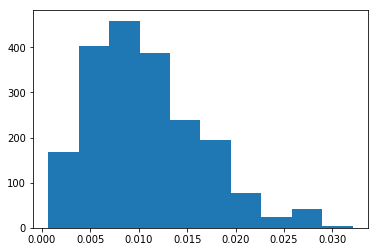

In [226]:
numsamp=len(samples[:,0])
theta=np.sort(samples[:,0])
low=np.median(theta)-theta[int(.16*numsamp)]
high=theta[int((1-.16)*numsamp)]-np.median(theta)
print("occurFact = "+str(np.median(theta))+" +"+str(high)+" -"+str(low))
plt.hist(samples[:,0])
plt.show()

In [183]:
logSamePois(0,0)

-0.6931471805599453

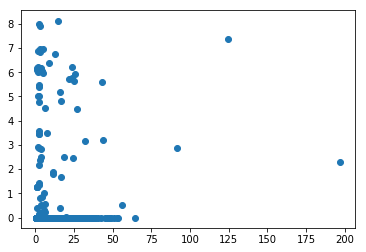

In [9]:
dMag=np.zeros(len(planet))
for i in range(len(planet)):
#     print(stellar.d_mag[stellar.EPIC==planet.EPIC.iloc[i]].iloc[0])
    dMag[i]=stellar.d_mag[stellar.EPIC==planet.EPIC.iloc[i]].iloc[0]

plt.scatter(planet.Rad,dMag)

In [57]:
from matplotlib.backends.backend_pdf import PdfPages
offset=np.sqrt(1+10**(-clustNumber/2.5))/np.sqrt(1+10**(clustNumber/2.5))
# print(len(offset[planet.Ratio*offset>1.04]))
x=np.arange(0,2,.1)
y=np.ones(len(x))*30
guy=planet.Ratio*np.sqrt(1+10**(-clustNumber/2.5))/np.sqrt(1+10**(clustNumber/2.5))+planet.b
guy2=planet.Ratio*np.sqrt(1+10**(-clustNumber/2.5))/np.sqrt(1+10**(clustNumber/2.5))
with PdfPages('fluxDilution.pdf')as pdf:
    plt.rcParams.update({'font.size': 14})
    plt.fill_between(x,np.ones(len(x))*1.05,np.ones(len(x))*5,color="#FDE725", alpha=.75)
    plt.scatter(planet.Ratio+planet.b,np.where(guy2<1,guy,planet.Ratio+planet.b), color ="black", s=2)
    plt.text(.01,1.95, "Potentially Diluted Background EBs", horizontalalignment="left",verticalalignment='top', color="#3CBB75", fontsize=13)
    plt.scatter((planet.Ratio+ planet.b)[((guy>1.04) | (guy2>.3))& (guy2<1)],guy[((guy>1.04) | (guy2>.3)) &(guy2<1)],color="#3CBB75", s=15)
    plt.xlabel("Catalog [$R_{\mathrm{pl}}/R_{\star}+b$]")
    plt.ylabel("Diluted [$R_{\mathrm{pl}}/R_{\star}+b$]")
#     plt.yscale("log")
#     plt.xscale("log")
    plt.xlim([0,1.04])
    plt.ylim([0,2])
#     plt.yticks([1,10,100,1000],["1","10","100","1000"])
#     plt.xticks([.3,1,3,10,30],["0.3","1","3","10","30"])
    pdf.savefig(bbox_inches = "tight")
    plt.close()
print(len((planet.Ratio+ planet.b)[((guy>1.04) | (guy2>.3))& (guy2<1)]))
print(len((planet.Ratio+ planet.b)[((guy2<=1))]))

30
65


30


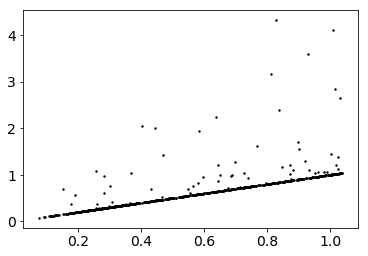

In [68]:
plt.scatter(planet.Ratio+ planet.b,planet.Ratio*np.sqrt(1+10**(dMag/2.5))/np.sqrt(1+10**(-dMag/2.5))+planet.b, color ="black", s=2)
guy=planet.Ratio*np.sqrt(1+10**(dMag/2.5))/np.sqrt(1+10**(-dMag/2.5))+planet.b
print(len(guy[guy>1.04]))


In [40]:
print(len((planet.Ratio+ planet.b)[(guy2>1)]))

12


In [45]:
stellarCoord=pd.read_csv("epic_coords.csv",sep=",", engine='python', header=0)
stellarCoord=stellarCoord[stellarCoord['epic_number'].isin(planet.EPIC.values.tolist())]

In [12]:
len(dMag[dMag==0])

672

In [49]:
stellarCoord.to_csv("starHost.csv", index=False)

In [15]:
cluster=pd.read_csv("K2Planet-result.csv",sep=",", engine='python', header=0)
cluster.angdist

0        0.000137
1        0.006400
2        0.009894
3        0.004371
4        0.000084
5        0.013020
6        0.015905
7        0.000101
8        0.005536
9        0.008035
10       0.000140
11       0.014783
12       0.000156
13       0.011608
14       0.002271
15       0.007854
16       0.000061
17       0.014714
18       0.015334
19       0.000149
20       0.016342
21       0.007103
22       0.000111
23       0.006381
24       0.003197
25       0.000166
26       0.005244
27       0.005614
28       0.000102
29       0.008358
           ...   
13926    0.008429
13927    0.015534
13928    0.000041
13929    0.004551
13930    0.013450
13931    0.012386
13932    0.009058
13933    0.002360
13934    0.013996
13935    0.009383
13936    0.014386
13937    0.000069
13938    0.014117
13939    0.014693
13940    0.004668
13941    0.014422
13942    0.005605
13943    0.010606
13944    0.000030
13945    0.006055
13946    0.010937
13947    0.005395
13948    0.000042
13949    0.010622
13950    0

In [51]:
clustNumber=np.zeros(len(planet))
clustB=np.zeros(len(planet))
for i in range(len(planet)):
    epi=planet.EPIC.iloc[i]
    dummy=cluster[cluster.epic_number==epi].drop_duplicates()
#     print(cluster[cluster.epic_number==epi].phot_g_mean_mag.drop_duplicates())
# clustB[i]=np.median(cluster[cluster.epic_number==epi].b.drop_duplicates())
    try:
        clustNumber[i]=np.sort(dummy.phot_g_mean_mag[dummy.angdist<.0012])[0]-np.sort(dummy.phot_g_mean_mag[dummy.angdist<.0012])[1]
#     clustB[i]=np.median(cluster[cluster.epic_number==epi].b.drop_duplicates())
    except:
        clustNumber[i]=-np.inf

In [52]:
len(clustNumber[clustNumber>-1000])


74

In [143]:
kepCluster=pd.read_csv("./kepCluster.csv", delimiter=",", names=["num"])

In [5]:
len(stellar.Ncomp[stellar.Ncomp>1])

4769

In [124]:
bins=np.arange(0,6,.3)
bins2=np.arange(0,6,.6)
with PdfPages('seperation.pdf')as pdf:
    plt.rcParams.update({'font.size': 14})
    plt.hist(np.log(kepCluster.num[(kepCluster.num>0) & (kepCluster.num<100000)]), bins=bins, color = "#33638D")
    plt.hist(np.log(clustNumber[(clustNumber>0) & (clustNumber<100000)]), bins=bins2,  color = "#73D055", alpha=.75)
    plt.xticks([0,2,4,6],["1","100","10000","100000"])
    plt.text(0.1,960, "Kepler", horizontalalignment="left",verticalalignment='top', color="#33638D", fontsize=14)
    plt.text(0.1,875, "K2", horizontalalignment="left",verticalalignment='top', color="#73D055", fontsize=14)
    plt.xlim([0,6])
    plt.xlabel("Stars within One Arcminute Radius")
    plt.ylabel("Number of Candidates")
    pdf.savefig(bbox_inches = "tight")
    plt.close()

In [144]:
kepCluster

,num
0,19.0
1,29.0
2,50.0
3,79.0
4,21.0
5,17.0
6,99.0
7,40.0
8,71.0
9,13.0
